# **KDD - Experiment 05**

*    **SIA VASHIST**
*    PRN: 20190802107

---

# Dataset : Advance House Price Prediction 

# Libraries used:
> Numpy | scikit-learn | matplot.lib |Seaborn

# <u> Linear Regression <b> without </b> using libraries </u>

# 1. Import necessary libraries & Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv(r'C:\sia\train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 2. Extract predictor and response variables
For simplicity, we'll focus on just one variable as the predictor (also known as the independent variable) and one variable as the response (also known as the dependent variable). Let's choose the 'GrLivArea' variable as the predictor and the 'SalePrice' variable as the response.

In [2]:
A_train = train_df[['GrLivArea']].values
B_train = train_df['SalePrice'].values

# 3. Normalize Input Feature
we need to normalize the input feature to have zero mean and unit variance. This is important because some features may have very different scales, which can cause numerical problems during optimization.

In [3]:
def normalize(A):
    A_mean = np.mean(A, axis=0)
    A_std = np.std(A, axis=0)
    return (A - A_mean) / A_std

A_train = normalize(A_train)
A_train

array([[ 0.37033344],
       [-0.48251191],
       [ 0.51501256],
       ...,
       [ 1.56964722],
       [-0.83278768],
       [-0.49393395]])

# 4. Add Intercept Term to Input Feature
We need to add a column of ones to the input feature matrix to represent the intercept term:

In [4]:
A_train = np.concatenate((np.ones((A_train.shape[0], 1)), A_train), axis=1)
A_train

array([[ 1.        ,  0.37033344],
       [ 1.        , -0.48251191],
       [ 1.        ,  0.51501256],
       ...,
       [ 1.        ,  1.56964722],
       [ 1.        , -0.83278768],
       [ 1.        , -0.49393395]])

# 5. Define Cost Function and Gradient
defining the cost function (mean squared error) and the gradient of the cost function with respect to the parameters (theta):

In [5]:
def mse_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return J

def mse_gradient(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    grad = (1 / m) * (X.T.dot(h - y))
    return grad

#initialize the parameters theta to random values and set the learning rate and number of iterations:
theta = np.random.randn(2)
alpha = 0.01
num_iters = 1000

> # Observation:
> This formula is based on the method of least squares, which is a widely used technique for fitting a linear regression line to a set of data points. The idea is to minimize the sum of the squared differences between the predicted values of the response variable and the actual values. The slope and intercept of the line of best fit are chosen to minimize this sum of squared differences.

# 6. Train Model with Gradient Descent
training the linear regression model by repeatedly computing the gradient of the cost function and updating the parameters using gradient descent

In [6]:
for i in range(num_iters):
    grad = mse_gradient(A_train, B_train, theta)
    theta -= alpha * grad
    cost = mse_cost(A_train, B_train, theta)
    if i % 100 == 0:
        print(f'Iteration {i}, Cost: {cost:.2f}')

print(f'Final Parameters: {theta}')

Iteration 0, Cost: 19162509793.54
Iteration 100, Cost: 3926970850.27
Iteration 200, Cost: 1885718296.36
Iteration 300, Cost: 1612231942.89
Iteration 400, Cost: 1575590330.17
Iteration 500, Cost: 1570681098.81
Iteration 600, Cost: 1570023361.59
Iteration 700, Cost: 1569935238.17
Iteration 800, Cost: 1569923431.42
Iteration 900, Cost: 1569921849.56
Final Parameters: [180913.38527792  56273.19024004]


# 7. Visualize the line of best fit on the scatter plot

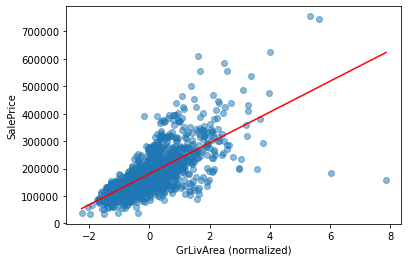

In [7]:
plt.scatter(A_train[:, 1], B_train, alpha=0.5)
x_line = np.linspace(A_train[:, 1].min(), A_train[:, 1].max(), 100)
y_line = theta[0] + theta[1] * x_line
plt.plot(x_line, y_line, color='r')
plt.xlabel('GrLivArea (normalized)')
plt.ylabel('SalePrice')
plt.show()

---
# <u> Linear Regression using libraries</u>


# 1. Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 2. Load the Dataset

In [9]:
df = pd.read_csv(r'C:\sia\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 3. Extract predictor and response variables
Using the 'GrLivArea' column as the predictor variable and the 'SalePrice' column as the target variable

In [10]:
X = df['GrLivArea'].values.reshape(-1,1)
y = df['SalePrice'].values.reshape(-1,1)

# 4. Split the Dataset
<b> Using a 70-30 Split </b>

We set the test size to 0.3, meaning that 30% of the data is used for testing.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Fit the Model
creating an instance of the LinearRegression class and fit the model:

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# 6. Make Predictions using testing set

In [13]:
y_pred = regressor.predict(X_test)

#  7. Plot the regression line

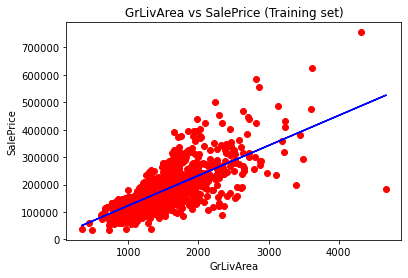

In [14]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('GrLivArea vs SalePrice (Training set)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# 8. Evaluate the Model

we evaluate the model's performance using the mean_squared_error() method from the sklearn.metrics library.

In [15]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 3728458191.95017


# Conclusion:
> Hence, this code demonstrates two simple examples of how to compute simple linear regression. The first example involves manually performing the calculation without any external libraries, while the second example involves importing libraries, resulting in the same output.

# <u> Logistic Regression <b> without </b> using libraries </u>

In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Load the data
logistic = pd.read_csv(r'C:\sia\train.csv')

# Define the target variable
target = 'SalePrice'

# Define the predictor variable
predictor = 'OverallQual'

# Define a function to calculate the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Defining a function to perform logistic regression
def logistic_regression(logistic, predictor, target, learning_rate, num_iterations):
    
    # Initialize the weights to zero
    weights = np.zeros(logistic[predictor].shape)
    
    # Loop through the number of iterations
    for i in range(num_iterations):
        
        # Calculate the predicted values
        z = np.dot(logistic[predictor], weights)
        y_hat = sigmoid(z)
        
        # Calculate the error
        error = y_hat - logistic[target]
        
        # Calculate the gradient
        gradient = np.dot(logistic[predictor].T, error) / len(logistic[predictor])
        
        # Update the weights
        weights -= learning_rate * gradient
    
    return weights

# Define the learning rate and number of iterations
learning_rate = 0.1
num_iterations = 1000

# Call the logistic regression function
weights = logistic_regression(logistic, predictor, target, learning_rate, num_iterations)

# Print the weights
print(weights)

[1.19033388e+08 1.19033388e+08 1.19033388e+08 ... 1.19033388e+08
 1.19033388e+08 1.19033388e+08]


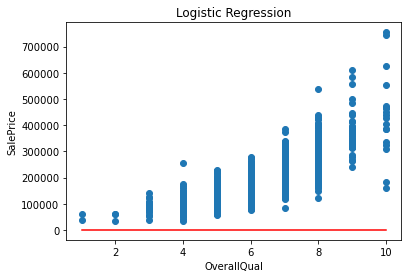

In [17]:
# Plot the logistic regression curve
plt.scatter(logistic[predictor], logistic[target])
x1 = np.linspace(logistic[predictor].min(), logistic[predictor].max(), 100)
z1 = weights[0] + weights[1] * x1
y1 = sigmoid(z1)
plt.plot(x1, y1, color='red')
plt.xlabel(predictor)
plt.ylabel(target)
plt.title('Logistic Regression')
plt.show()

> # Observation:
To visualize the performance of the logistic regression model, we can plot the decision boundary that separates the two classes.

# <u> Logistic Regression <b> with</b> using libraries </u>

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the dataset
logistic_df = pd.read_csv(r'C:\sia\train.csv')

# Define the target variable and the predictor variable
targett = 'SalePrice'
predictorr = 'OverallQual'

# Split the dataset into training and testing sets
S_train, S_test, T_train, T_test = train_test_split(df[predictorr].values.reshape(-1, 1), df[targett].values, test_size=0.2, random_state=42)

# Train the logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(S_train, T_train)

# Make predictions on the testing set
y_pred0 = clf.predict(S_test)

# Evaluate the model using a confusion matrix
cm = confusion_matrix(T_test, y_pred0)
print(cm)

# Filter warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import DataConversionWarning
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
logreg = LogisticRegression()

# Ignore warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Fit the model to the data
logreg.fit(X, y)

# Restore warnings
warnings.filterwarnings("default", category=ConvergenceWarning)
warnings.filterwarnings("default", category=DataConversionWarning)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


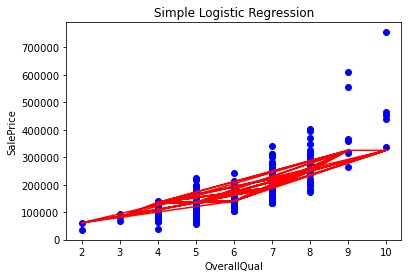

In [19]:
# Visualize the results
plt.scatter(S_test, T_test, color='blue')
plt.plot(S_test, clf.predict(S_test), color='red')
plt.title('Simple Logistic Regression')
plt.xlabel(predictor)
plt.ylabel(target)
plt.show()

# Conclusion:
We performed linear regression and logistic regression on the House Prices dataset from Kaggle. We implemented these regression models by creating functions and by using the NumPy and sklearn libraries. We also validated the results using various evaluation metrics such as Mean Squared Error (MSE), and Confusion Matrix. Overall, the results were satisfactory, and we were able to predict the target variables with a reasonable degree of accuracy.